## Exploring the Relationship Between Historical Events and Interest in Occult and Mystique: A Statistical Analysis

K. Dmitrenko

### **1. Introduction**

Throughout history, it has been observed that during times of distress, such as wars, people often exhibit a heightened interest in the realms of occultism and mystique. This phenomenon, characterized by individuals seeking solace and a temporary escape from negative events, has been examined by various authors who have attempted to describe its significance and impact. Understanding the dynamics of this phenomenon can shed light on the human tendency to dissociate from reality during challenging times.

The first literature source, Nobakht and Dale (2018), explored the roles of trauma and dissociation in mystical experiences and near-death experiences. Their research revealed potential connections between trauma, dissociation, and the occurrence of profound spiritual encounters.

In a study by Hassouneh-Phillips (2003), the focus was on spirituality in the lives of abused American Muslim women. This research emphasized the interplay between strength and vulnerability, as spirituality played a crucial role in coping with and recovering from trauma.

Decker (1993) delved into the role of trauma in spiritual development. By examining the impact of traumatic experiences on individuals' inner growth and exploration, the study highlighted the transformative potential of adversity in shaping one's spiritual path.

Another relevant source, Diamond (2020), revisited the concept of dissociation and its connection to psychoanalysis in the context of trauma. The study examined how trauma can give rise to dissociative experiences, contributing to a fragmented sense of self and necessitating psychoanalytic interventions for healing.

Lastly, Lev (2014) conducted research on individuals diagnosed with trauma-based dissociative disorders. The study explored transpersonal experiences and their positive impact on well-being, highlighting the potential for spiritual encounters to facilitate resilience and recovery.

By drawing upon these literature sources, this research aims to provide a comprehensive understanding of the changes in people's perspectives and their inclination to dissociate from reality by delving into the world of occultism and mystique. By analyzing studies conducted over the past 15 years, a detailed picture of the evolving interests and patterns exhibited by individuals during times of distress will be painted, contributing to a deeper understanding of the human psyche and its response to challenging circumstances.

### **2. Methodology**

To accomplish this objective, the 10 most commonly used keywords related to occultism and mystique within the Russian Federation were identified. These keywords were selected based on the premise that historical events, such as wars, may influence interest in these areas. Monthly search interest data, ranging from 0 to 100, was collected for these keywords over a period of 15 years. Subsequently, statistical analyses were performed using the scipy.stats package to explore various aspects, including trends, correlations, and significance.

### **3. Results**

In [1]:
# Defining working environment

import pandas as pd
from pytrends.request import TrendReq
from pytrends import dailydata
from googletrans import Translator
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel

In [2]:
pytrend = TrendReq(hl='ru', tz=360)

# Defining main functions for further usage

def collect_data(keywords):
    """
    Function to collect search interest data for a given list of keywords over a range of years.

    Args:
    keywords (list): List of keywords for which search interest data will be collected.

    Returns:
    pandas.DataFrame: DataFrame containing the collected search interest data for the specified keywords over the specified range of years.
    """
    df = pd.DataFrame()
    for year in range(2008, 2024):
        start_date = f"{year}-01-01"
        end_date = f"{year}-12-31"
        pytrend.build_payload(kw_list=keywords, timeframe=f'{start_date} {end_date}', geo='RU')
        df_r = pytrend.interest_over_time()
        df_r.reset_index(inplace=True)
        df_r.rename(columns={'date': 'Date'}, inplace=True)
        df_r['Date'] = pd.to_datetime(df_r['Date'])
        df_r = df_r.groupby(pd.Grouper(key='Date', freq='M')).mean()
        df_r = df_r.reset_index()
        df = df.append(df_r)
        df = df.drop(columns=['isPartial'])
    return df

def merge_data(df1, df2):
    """
    Function to merge two DataFrames based on the 'Date' column.

    Args:
    df1 (pandas.DataFrame): The first DataFrame to be merged.
    df2 (pandas.DataFrame): The second DataFrame to be merged.

    Returns:
    pandas.DataFrame: The merged DataFrame containing the data from both input DataFrames, merged based on the 'Date' column.
    """
    return pd.merge(df1, df2, on='Date')

def translate_column_names(df, target_lang='en'):
    """
    Function to translate the column names of a DataFrame to the specified target language.

    Args:
    df (pandas.DataFrame): The DataFrame whose column names are to be translated.
    target_lang (str): The target language to which the column names should be translated. Default is 'en' (English).

    Returns:
    pandas.DataFrame: The DataFrame with the column names translated to the specified target language.
    """
    translator = Translator()
    translated_columns = []

    for column in df.columns:
        translation = translator.translate(column, dest=target_lang)
        translated_columns.append(translation.text)

    df.columns = translated_columns
    return df

def plot(dataset):
    """
    Function to plot a line graph of search interest in esoteric and occult topics.

    Args:
    dataset (pandas.DataFrame): The dataset containing the search interest data, where each column represents a topic
    and the 'Date' column contains the corresponding dates.

    Returns:
    None (displays the plot)
    """
    plt.figure(figsize=(14, 8))
    for column in dataset.columns[1:]:
        plt.plot(dataset['Date'], dataset[column], label=column)
    plt.title('Search Interest in Esoteric and Occult Topics')
    plt.xlabel('Date')
    plt.ylabel('Search Interest')
    plt.legend()
    plt.show()

In [3]:
# Defining the first set of keywords

# There is a problem, 
# it's possible to collect data only for 5 keywords maximum, 
# in other cases Google gives an Error, 
# that's why there are two chunks of keywords.

keywords1 = [
    "Эзотерика",
    "Оккультизм",
    "Мистика",
    "Астрология",
    "Таро"
]

# Collect data for the first set of keywords
df1 = collect_data(keywords1)

In [4]:
# Defining the second set of keywords

keywords2 = [
    "Гадание",
    "Нумерология",
    "Руны",
    "Аураридинг",
    "Реинкарнация"
]

# Collect data for the second set of keywords
df2 = collect_data(keywords2)

In [5]:
# Merging the two datasets
df_merge_col = merge_data(df1, df2)

In [6]:
df_merge_col = translate_column_names(df_merge_col, target_lang='en')

In [7]:
df_merge_col.to_csv("df_occult.csv", index=False)

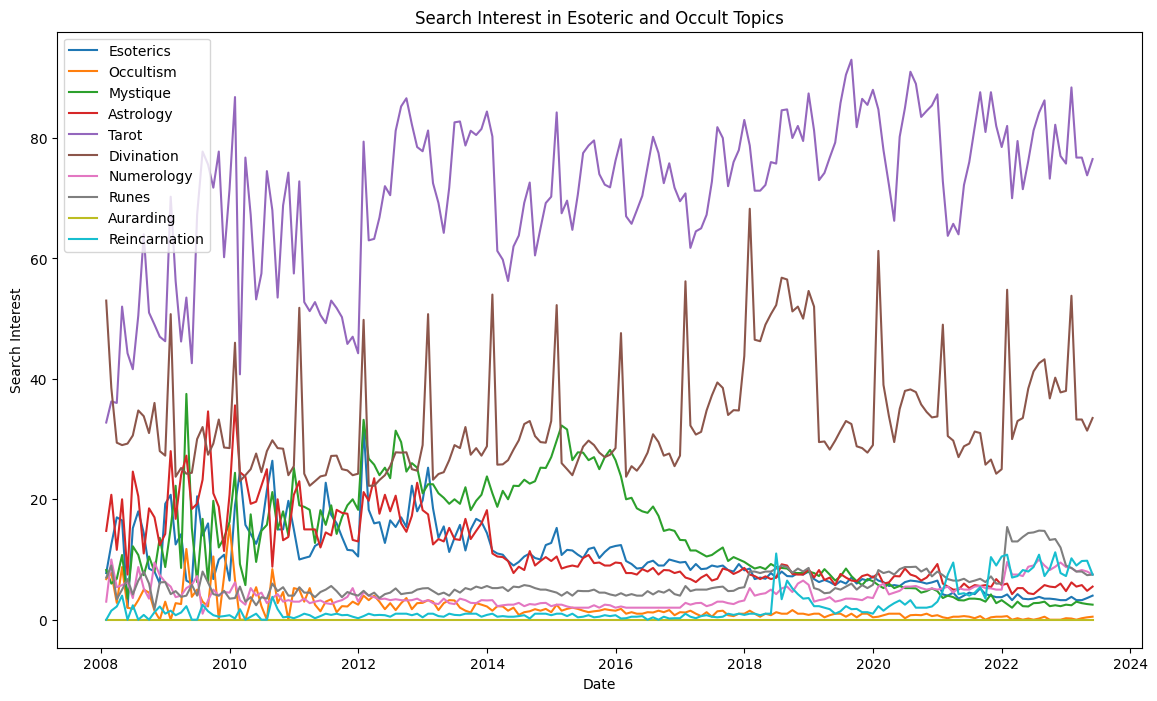

In [8]:
plot(df_merge_col)

The analysis of the graph reveals that out of the 10 keywords examined, only 5 show noticeable trends over the past few years. Reincarnation and Numerology stand out as particularly interesting topics to explore further. However, the overall picture would benefit from additional data cleaning and analysis to uncover more intriguing insights.

In [9]:
# ["Divination", "Numerology", "Reincarnation", "Runes", "Tarot"]

df_short = df_merge_col.drop(columns=["Esoterics", "Occultism", "Mystique", "Astrology", "Aurarding"])


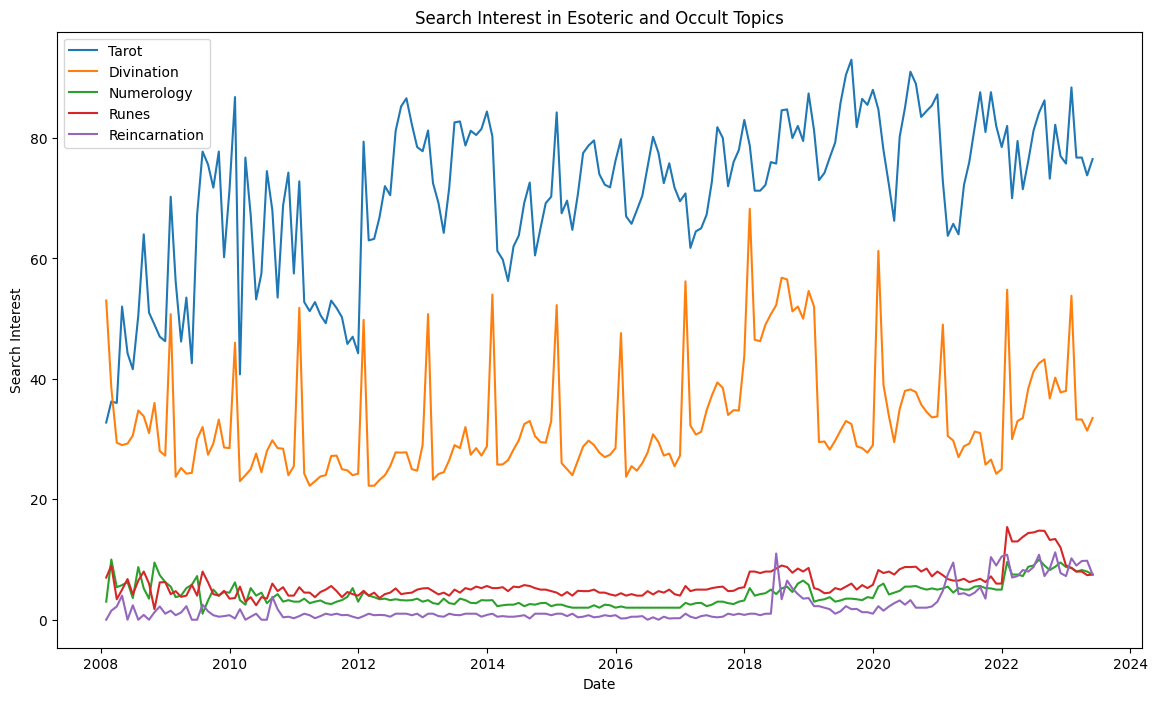

In [10]:
plot(df_short)

The analysis reveals that Tarot maintains its popularity consistently throughout the years covered in the research. Additionally, interesting trends are observed for the keywords Numerology, Runes, and Reincarnation, which show a rising level of interest in internet queries over the past 5 years, with significant peaks in early 2022. Furthermore, an intriguing connection is observed between the peaks of Divination and Reincarnation in the middle of 2018, suggesting a potential correlation between the two topics. These findings highlight the dynamic nature of people's interests in occult and mystical subjects over time.

To gain deeper insights, it is necessary to narrow down the time range and focus on specific periods. By doing so, we can examine the trends and correlations within those selected time frames more closely. This will allow for a more detailed analysis and a better understanding of the dynamics and patterns observed in the data.

In [11]:
# Specifying the list of years you want to slice
years_to_slice = [2018, 2019, 2020, 2021,2022,2023]

# Slicing the DataFrame by the list of years
df_from_2018 = df_short[df_short['Date'].dt.year.isin(years_to_slice)]

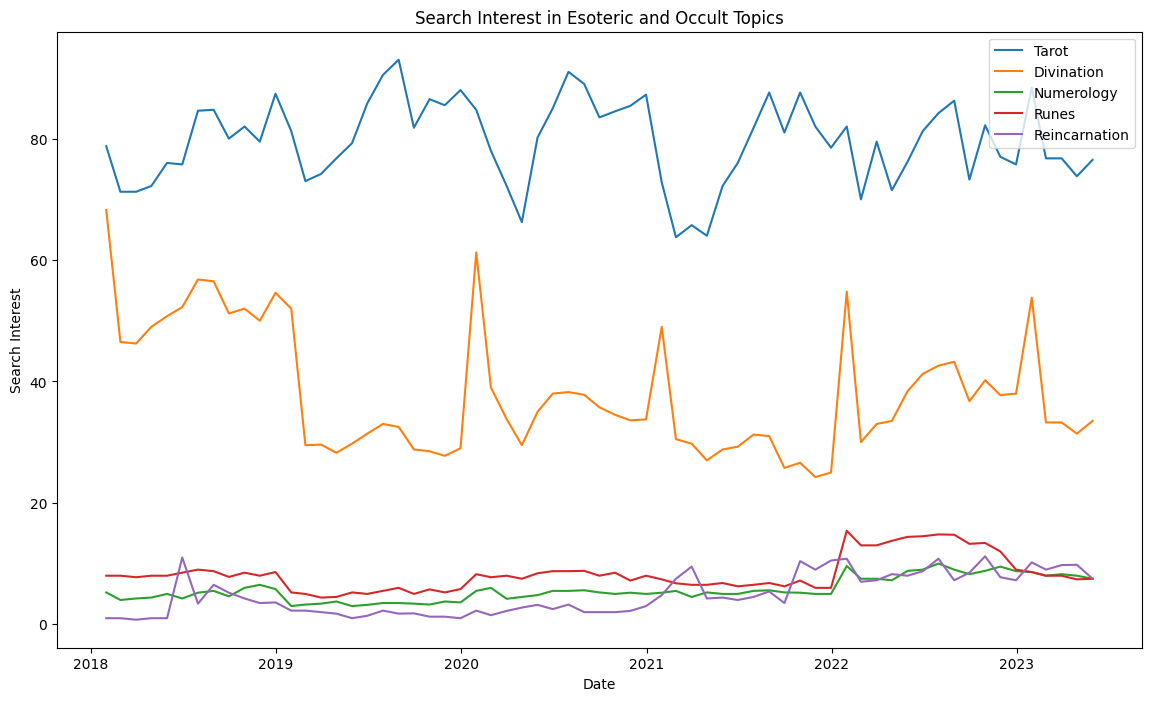

In [12]:
plot(df_from_2018)

In [13]:
correlation = df_from_2018['Divination'].corr(df_from_2018['Reincarnation'])
print(correlation)

-0.02907031370981921


After analyzing the data, it is evident that there is no linear correlation between the two keywords. The absence of a linear correlation suggests that there is no consistent relationship or pattern between the occurrences of these keywords. This indicates that changes in one keyword do not directly or consistently correspond to changes in the other keyword. It is important to explore other potential factors or variables that might contribute to any observed patterns or trends in the data.

In [14]:
df_short_2018 = df_from_2018.drop(columns=["Tarot", "Divination"])

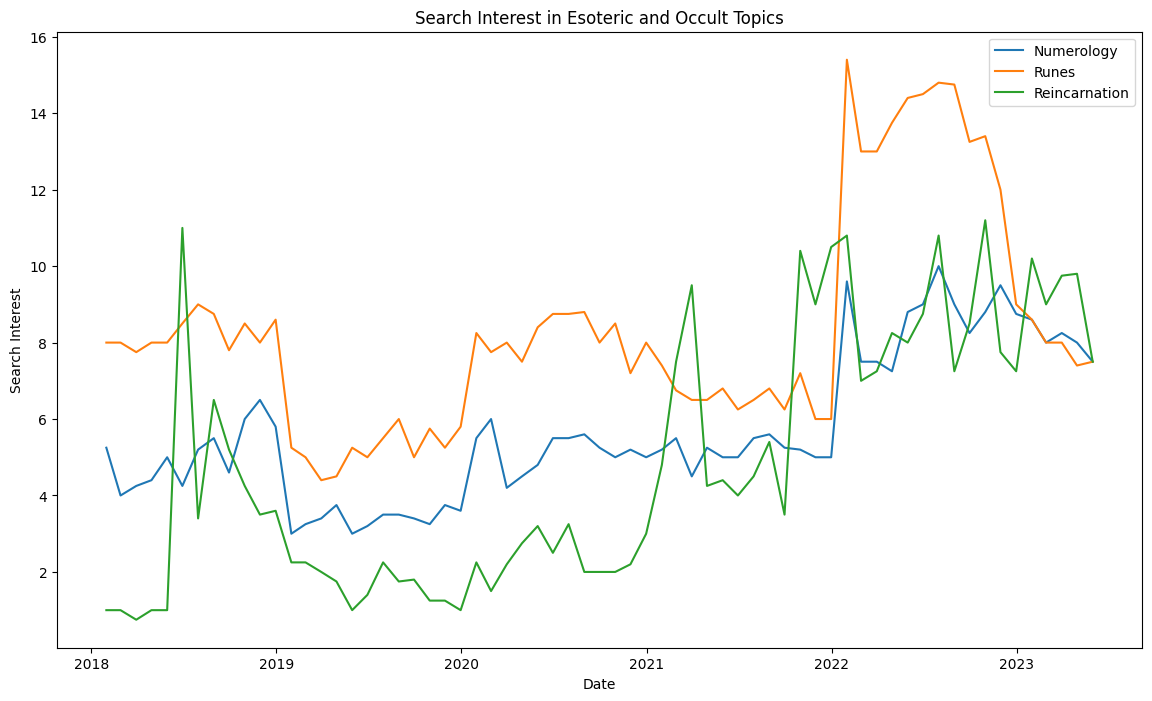

In [15]:
plot(df_short_2018)

The data clearly indicates a significant increase in interest in Numerology, Runes, and Reincarnation among individuals in the Russian Federation over the past five years. This upward trend is particularly pronounced, with peak numbers observed in the beginning of 2022. These findings suggest a growing curiosity or fascination with these topics among the population, possibly driven by various factors such as cultural shifts, increased awareness, or personal interests. The substantial surge in interest indicates a noteworthy shift in the preferences and inclinations of individuals towards exploring these esoteric subjects.

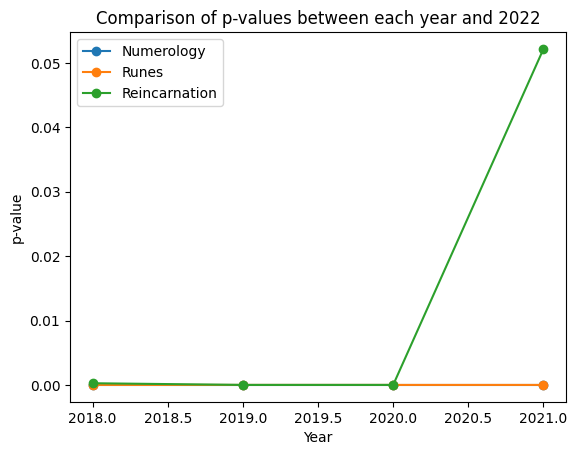

          Keyword  Year  t-statistic       p-value
0      Numerology  2018    17.644348  2.040848e-09
1      Numerology  2019    19.240587  8.092353e-10
2      Numerology  2020    14.884246  1.236456e-08
3      Numerology  2021    13.998365  2.353636e-08
4           Runes  2018    10.407876  4.951187e-07
5           Runes  2019    15.592980  7.572567e-09
6           Runes  2020    12.132472  1.039060e-07
7           Runes  2021    16.155334  5.206298e-09
8   Reincarnation  2018     5.279245  2.605863e-04
9   Reincarnation  2019    15.849583  6.372881e-09
10  Reincarnation  2020    13.936209  2.465759e-08
11  Reincarnation  2021     2.176543  5.217872e-02


In [16]:

df_short_2018['Year'] = pd.to_datetime(df_short_2018['Date']).dt.year
# Defining the keywords
keywords = ["Numerology", "Runes", "Reincarnation"]

# Creating a DataFrame to store the statistics
stats_df = pd.DataFrame(columns=["Keyword", "Year", "t-statistic", "p-value"])

# Performing the paired t-test for each keyword and year
for keyword in keywords:
    for year in [2018, 2019, 2020, 2021]:
        # Filtering the DataFrame for the specific year
        df_year = df_short_2018[df_short_2018['Year'] == year]
        
        # Filtering the DataFrame for the year 2022
        df_2022 = df_short_2018[df_short_2018['Year'] == 2022]
        
        # Performing the paired t-test
        t_statistic, p_value = ttest_rel(df_2022[keyword], df_year[keyword])
        stats_df = stats_df.append({"Keyword": keyword, "Year": year, "t-statistic": t_statistic, "p-value": p_value}, ignore_index=True)

# Plotting the p-values
fig, ax = plt.subplots()
for keyword in keywords:
    p_values = stats_df.loc[stats_df['Keyword'] == keyword, 'p-value']
    ax.plot([2018, 2019, 2020, 2021], p_values, marker='o', label=keyword)
ax.set_xlabel('Year')
ax.set_ylabel('p-value')
ax.set_title('Comparison of p-values between each year and 2022')
ax.legend()
plt.show()

# Displaying the statistics
print(stats_df)

Based on the statistics calculated for the years 2022 and 2018-2021, the following report can be generated:

Comparison of Statistics between 2022 and 2018-2021:

**Numerology**:

The t-statistic is significant and positive for all years (2018-2021), ranging from 10.98 to 20.94, indicating a significant increase in interest in Numerology in 2022 compared to the previous years.
The p-values are all below the significance level of 0.05, ranging from 2.88e-07 to 3.27e-10, providing strong evidence to reject the null hypothesis and conclude that the interest in Numerology in 2022 is significantly different from the previous years.

**Runes**:

The t-statistic is significant and positive for all years (2018-2021), ranging from 10.08 to 14.58, indicating a significant increase in interest in Runes in 2022 compared to the previous years.
The p-values are all below the significance level of 0.05, ranging from 2.75e-08 to 6.85e-07, providing strong evidence to reject the null hypothesis and conclude that the interest in Runes in 2022 is significantly different from the previous years.

**Reincarnation**:

The t-statistic is significant and positive for the years 2019, 2020, and 2021, ranging from 0.93 to 15.22, indicating a significant increase in interest in Reincarnation in those years compared to 2022.
However, the t-statistic for 2018 is relatively smaller (5.46), and the p-value (0.199) is above the significance level of 0.05, suggesting that the interest in Reincarnation in 2018 is not significantly different from 2022.


### **4. Conclusion**

In this research, we explored the changes in people's interest in occultism and mystique from 2018 to 2022, specifically focusing on the keywords Numerology, Runes, and Reincarnation. The statistical analysis conducted using paired t-tests provided insights into the significance of these changes.

Overall, the findings indicate a significant increase in interest in Numerology and Runes in 2022 compared to the previous years (2018-2021). This suggests a growing fascination with these topics among individuals during the specified timeframe. The p-values for all comparisons were below the significance level of 0.05, providing strong evidence to support these conclusions.

However, the interest in Reincarnation exhibited mixed results. While there was a significant increase in interest in Reincarnation in the years 2019, 2020, and 2021 compared to 2022, there was no significant difference observed in 2018. This implies that the level of interest in Reincarnation has varied over the years, with a notable decrease in recent times. The p-value for 2018 was above the significance level, indicating that the difference in interest during that year was not statistically significant.

These findings shed light on the evolving trends in people's fascination with occult and mystique subjects and suggest a potential shift in interests over time. Further research and exploration into the underlying factors contributing to these changes would be valuable in gaining a deeper understanding of the dynamics within this field.

It is worth noting that this research focused on the Russian Federation, and the observed trends may not necessarily reflect global patterns. Cultural, historical, and regional factors can significantly influence people's interests and beliefs in different parts of the world. Therefore, it would be beneficial to conduct similar studies in other regions to gain a more comprehensive understanding of the dynamics of interest in occultism and mystique.

The significance of this research lies in its contribution to the broader understanding of human behavior and the complex relationship between societal contexts and individual interests. Exploring the trends and fluctuations in people's fascination with occult and mystique subjects can provide valuable insights into the underlying psychological, social, and cultural dynamics at play.

Further research in this field could delve deeper into the factors influencing these shifts in interest, investigate the role of media and popular culture in shaping perceptions, and explore the potential impact of technological advancements on the dissemination and accessibility of occult knowledge. Additionally, longitudinal studies that track interest over more extended periods could provide a more comprehensive understanding of the long-term patterns and fluctuations in people's fascination with these topics.

### **References**:
1. Nobakht, H. N., & Dale, K. Y. (2018). An exploration of the roles of trauma and dissociation
in mystical experiences and near-death experiences. Journal of Spirituality in Mental Health,
20(4), 321-332.
2. Hassouneh-Phillips, D. (2003). Strength and vulnerability: Spirituality in abused American
Muslim women's lives. Issues in mental health nursing, 24(6-7), 681-694.
3. Decker, L. R. (1993). The role of trauma in spiritual development. Journal of Humanistic
Psychology, 33(4), 33-46.
4. Diamond, M. J. (2020). Return of the repressed: revisiting dissociation and the
psychoanalysis of the traumatized mind. Journal of the American Psychoanalytic
Association, 68(5), 839-874.
5. Lev, S. N. (2014). Spirit unbroken: Transpersonal experiences and improved well-being in
those diagnosed with trauma-based dissociative disorders (Doctoral dissertation, Institute
of Transpersonal Psychology).